In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import f_oneway
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, precision_recall_fscore_support
plt.style.use('Solarize_Light2')

def add_bar_labels(ax):
    #ax = plt.gca()
    for i in ax.patches:
        ax.text(i.get_x() + i.get_width() / 2., i.get_height(), 
                '%d' % int(i.get_height()), fontsize=10,
                ha="center", va='bottom')

C:\Users\shrey\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df = pd.read_csv("Data\\Data.csv")

In [3]:
df

,PROSPECTID,Total_TL,Tot_Closed_TL,Tot_Active_TL,Total_TL_opened_L6M,Tot_TL_closed_L6M,pct_tl_open_L6M,pct_tl_closed_L6M,pct_active_tl,pct_closed_tl,...,pct_PL_enq_L6m_of_L12m,pct_CC_enq_L6m_of_L12m,pct_PL_enq_L6m_of_ever,pct_CC_enq_L6m_of_ever,HL_Flag,GL_Flag,last_prod_enq2,first_prod_enq2,Credit_Score,Approved_Flag
0,1,5,4,1,0,0,0.000,0.00,0.200,0.800,...,0.0,0.0,0.000,0.0,1,0,PL,PL,696,P2
1,2,1,0,1,0,0,0.000,0.00,1.000,0.000,...,0.0,0.0,0.000,0.0,0,0,ConsumerLoan,ConsumerLoan,685,P2
2,3,8,0,8,1,0,0.125,0.00,1.000,0.000,...,0.0,0.0,0.000,0.0,1,0,ConsumerLoan,others,693,P2
3,5,3,2,1,0,0,0.000,0.00,0.333,0.667,...,0.0,0.0,0.000,0.0,0,0,AL,AL,753,P1
4,6,6,5,1,0,0,0.000,0.00,0.167,0.833,...,1.0,0.0,0.429,0.0,1,0,ConsumerLoan,PL,668,P3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42059,51332,3,0,3,1,0,0.333,0.00,1.000,0.000,...,0.0,0.0,0.000,0.0,0,0,ConsumerLoan,ConsumerLoan,650,P4
42060,51333,4,2,2,0,1,0.000,0.25,0.500,0.500,...,0.0,0.0,0.000,0.0,0,0,others,others,702,P1
42061,51334,2,1,1,1,1,0.500,0.50,0.500,0.500,...,1.0,0.0,1.000,0.0,0,0,ConsumerLoan,others,661,P3
42062,51335,2,1,1,0,0,0.000,0.00,0.500,0.500,...,0.0,0.0,0.000,0.0,0,0,ConsumerLoan,others,686,P2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42064 entries, 0 to 42063
Data columns (total 79 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   PROSPECTID                  42064 non-null  int64  
 1   Total_TL                    42064 non-null  int64  
 2   Tot_Closed_TL               42064 non-null  int64  
 3   Tot_Active_TL               42064 non-null  int64  
 4   Total_TL_opened_L6M         42064 non-null  int64  
 5   Tot_TL_closed_L6M           42064 non-null  int64  
 6   pct_tl_open_L6M             42064 non-null  float64
 7   pct_tl_closed_L6M           42064 non-null  float64
 8   pct_active_tl               42064 non-null  float64
 9   pct_closed_tl               42064 non-null  float64
 10  Total_TL_opened_L12M        42064 non-null  int64  
 11  Tot_TL_closed_L12M          42064 non-null  int64  
 12  pct_tl_open_L12M            42064 non-null  float64
 13  pct_tl_closed_L12M          420

In [5]:
categorical_columns = []
for i in df.columns:
    if df[i].dtype == 'object' and i != 'Approved_Flag':
        print(i)
        categorical_columns.append(i)

MARITALSTATUS
EDUCATION
GENDER
last_prod_enq2
first_prod_enq2


### CHI-SQUARE TEST

In [6]:
for i in categorical_columns:
    chi2, pval, _, _ = chi2_contingency(pd.crosstab(df[i], df['Approved_Flag']))
    print(i, '-->', pval)

MARITALSTATUS --> 3.578180861038862e-233
EDUCATION --> 2.6942265249737532e-30
GENDER --> 1.907936100186563e-05
last_prod_enq2 --> 0.0
first_prod_enq2 --> 7.84997610555419e-287


In [7]:
# SINCE ALL THE CATEGORICAL FEATURES HAVE P-VAL LESS THAN <=0.05, WE WILL NOT REMOVE ANY OF THEM.

In [8]:
numerical_columns = []
for i in df.columns:
    if df[i].dtype != 'object' and i != 'PROSPECTID':
        numerical_columns.append(i)

In [9]:
df.shape

(42064, 79)

In [10]:
vif_data = df[numerical_columns]
total_columns = vif_data.shape[1]
columns_to_be_kept = []
columns_index = 0

for i in range(0, total_columns):
    vif_value = variance_inflation_factor(vif_data, columns_index)
    print(i,". ", numerical_columns[i], "->", vif_value)
    
    if vif_value <= 6:
        columns_to_be_kept.append(numerical_columns[i])
        columns_index = columns_index + 1
    else:
        vif_data = vif_data.drop([numerical_columns[i]], axis = 1)

0 .  Total_TL -> inf
1 .  Tot_Closed_TL -> inf
2 .  Tot_Active_TL -> 11.320180023967996
3 .  Total_TL_opened_L6M -> 8.363698035000327
4 .  Tot_TL_closed_L6M -> 6.520647877790928
5 .  pct_tl_open_L6M -> 5.149501618212625
6 .  pct_tl_closed_L6M -> 2.611111040579735
7 .  pct_active_tl -> inf
8 .  pct_closed_tl -> 1788.7926256209232
9 .  Total_TL_opened_L12M -> 8.601028256477228
10 .  Tot_TL_closed_L12M -> 3.8328007921530785
11 .  pct_tl_open_L12M -> 6.099653381646739
12 .  pct_tl_closed_L12M -> 5.5813520096427585
13 .  Tot_Missed_Pmnt -> 1.985584353098778
14 .  Auto_TL -> inf
15 .  CC_TL -> 4.809538302819343
16 .  Consumer_TL -> 23.270628983464636
17 .  Gold_TL -> 30.595522588100053
18 .  Home_TL -> 4.3843464059655854
19 .  PL_TL -> 3.0646584155234238
20 .  Secured_TL -> 2.898639771299252
21 .  Unsecured_TL -> 4.377876915347324
22 .  Other_TL -> 2.2078535836958433
23 .  Age_Oldest_TL -> 4.916914200506864
24 .  Age_Newest_TL -> 5.214702030064725
25 .  time_since_recent_payment -> 3.3861625

In [11]:
len(columns_to_be_kept)

39

### CHECKING ANOVA FOR THE COLUMNS TO BE KEPT

In [12]:
columns_to_be_kept_numerical = []

for i in columns_to_be_kept:
    a = list(df[i])
    b = list(df['Approved_Flag'])
    
    group_P1 = [value for value, group in zip(a, b) if group == 'P1']
    group_P2 = [value for value, group in zip(a, b) if group == 'P2']
    group_P3 = [value for value, group in zip(a, b) if group == 'P3']
    group_P4 = [value for value, group in zip(a, b) if group == 'P4']
    
    f_statistic, p_value = f_oneway(group_P1, group_P2, group_P3, group_P4)
    
    if p_value <= 0.05:
        columns_to_be_kept_numerical.append(i)

In [13]:
len(columns_to_be_kept_numerical)

37

### LISTIING ALL THE FINAL FEATURE

In [14]:
features = columns_to_be_kept_numerical + ['MARITALSTATUS','EDUCATION','GENDER','last_prod_enq2','first_prod_enq2','Approved_Flag']

In [15]:
len(features)

43

In [16]:
df = df[features]
df.shape

(42064, 43)

In [17]:
# LABEL ENCODING FOR A CATEGORICAL FEATURES
print("MARITALSTATUS   :- ",df['MARITALSTATUS'].unique())
print("EDUCATION       :- ",df['EDUCATION'].unique())
print("GENDER          :- ",df['GENDER'].unique())
print("last_prod_enq2  :-",df['last_prod_enq2'].unique())
print("first_prod_enq2 :- ",df['first_prod_enq2'].unique())

MARITALSTATUS   :-  ['Married' 'Single']
EDUCATION       :-  ['12TH' 'GRADUATE' 'SSC' 'POST-GRADUATE' 'UNDER GRADUATE' 'OTHERS'
 'PROFESSIONAL']
GENDER          :-  ['M' 'F']
last_prod_enq2  :- ['PL' 'ConsumerLoan' 'AL' 'CC' 'others' 'HL']
first_prod_enq2 :-  ['PL' 'ConsumerLoan' 'others' 'AL' 'HL' 'CC']


In [18]:
# Ordinal feature -- EDUCATION
# SSC            : 1
# 12TH           : 2
# GRADUATE       : 3
# UNDER GRADUATE : 3
# POST-GRADUATE  : 4
# OTHERS         : 1
# PROFESSIONAL   : 4

In [19]:
df.loc[df['EDUCATION']=='SSC', ['EDUCATION']] = 1
df.loc[df['EDUCATION']=='12TH', ['EDUCATION']] = 2
df.loc[df['EDUCATION']=='GRADUATE', ['EDUCATION']] = 3
df.loc[df['EDUCATION']=='UNDER GRADUATE', ['EDUCATION']] = 3
df.loc[df['EDUCATION']=='POST-GRADUATE', ['EDUCATION']] = 4
df.loc[df['EDUCATION']=='OTHERS', ['EDUCATION']] = 1
df.loc[df['EDUCATION']=='PROFESSIONAL', ['EDUCATION']] = 4

In [20]:
df['EDUCATION'].unique()

array([2, 3, 1, 4], dtype=object)

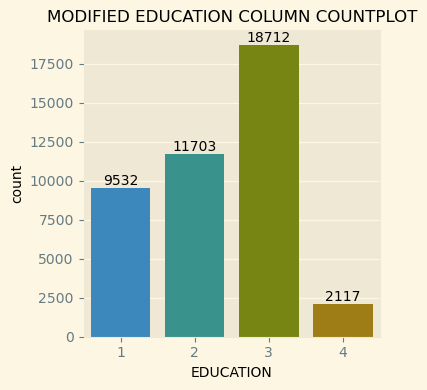

In [21]:
plt.figure(figsize=(4, 4))
sns.countplot(data=df, x='EDUCATION')
plt.title("MODIFIED EDUCATION COLUMN COUNTPLOT", size=12)
ax = plt.gca()
add_bar_labels(ax)
plt.tight_layout()
plt.show()

In [22]:
df['EDUCATION'].value_counts(normalize=True)

EDUCATION
3    0.444846
2    0.278219
1    0.226607
4    0.050328
Name: proportion, dtype: float64

In [23]:
df['EDUCATION'].value_counts()
df['EDUCATION'] = df['EDUCATION'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42064 entries, 0 to 42063
Data columns (total 43 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   pct_tl_open_L6M            42064 non-null  float64
 1   pct_tl_closed_L6M          42064 non-null  float64
 2   Tot_TL_closed_L12M         42064 non-null  int64  
 3   pct_tl_closed_L12M         42064 non-null  float64
 4   Tot_Missed_Pmnt            42064 non-null  int64  
 5   CC_TL                      42064 non-null  int64  
 6   Home_TL                    42064 non-null  int64  
 7   PL_TL                      42064 non-null  int64  
 8   Secured_TL                 42064 non-null  int64  
 9   Unsecured_TL               42064 non-null  int64  
 10  Other_TL                   42064 non-null  int64  
 11  Age_Oldest_TL              42064 non-null  int64  
 12  Age_Newest_TL              42064 non-null  int64  
 13  time_since_recent_payment  42064 non-null  int

In [24]:
df_encoded = pd.get_dummies(df, columns=['MARITALSTATUS','GENDER', 'last_prod_enq2' ,'first_prod_enq2'])

In [25]:
df_encoded.info()
k = df_encoded.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42064 entries, 0 to 42063
Data columns (total 55 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   pct_tl_open_L6M               42064 non-null  float64
 1   pct_tl_closed_L6M             42064 non-null  float64
 2   Tot_TL_closed_L12M            42064 non-null  int64  
 3   pct_tl_closed_L12M            42064 non-null  float64
 4   Tot_Missed_Pmnt               42064 non-null  int64  
 5   CC_TL                         42064 non-null  int64  
 6   Home_TL                       42064 non-null  int64  
 7   PL_TL                         42064 non-null  int64  
 8   Secured_TL                    42064 non-null  int64  
 9   Unsecured_TL                  42064 non-null  int64  
 10  Other_TL                      42064 non-null  int64  
 11  Age_Oldest_TL                 42064 non-null  int64  
 12  Age_Newest_TL                 42064 non-null  int64  
 13  t

In [26]:
df_encoded

,pct_tl_open_L6M,pct_tl_closed_L6M,Tot_TL_closed_L12M,pct_tl_closed_L12M,Tot_Missed_Pmnt,CC_TL,Home_TL,PL_TL,Secured_TL,Unsecured_TL,...,last_prod_enq2_ConsumerLoan,last_prod_enq2_HL,last_prod_enq2_PL,last_prod_enq2_others,first_prod_enq2_AL,first_prod_enq2_CC,first_prod_enq2_ConsumerLoan,first_prod_enq2_HL,first_prod_enq2_PL,first_prod_enq2_others
0,0.000,0.00,0,0.000,0,0,0,4,1,4,...,False,False,True,False,False,False,False,False,True,False
1,0.000,0.00,0,0.000,0,0,0,0,0,1,...,True,False,False,False,False,False,True,False,False,False
2,0.125,0.00,0,0.000,1,0,0,0,2,6,...,True,False,False,False,False,False,False,False,False,True
3,0.000,0.00,0,0.000,0,0,0,0,3,0,...,False,False,False,False,True,False,False,False,False,False
4,0.000,0.00,1,0.167,0,0,0,0,6,0,...,True,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42059,0.333,0.00,0,0.000,0,0,0,0,0,3,...,True,False,False,False,False,False,True,False,False,False
42060,0.000,0.25,1,0.250,0,0,0,0,2,2,...,False,False,False,True,False,False,False,False,False,True
42061,0.500,0.50,1,0.500,0,0,0,0,0,2,...,True,False,False,False,False,False,False,False,False,True
42062,0.000,0.00,1,0.500,0,0,0,0,0,2,...,True,False,False,False,False,False,False,False,False,True


### Machine Learing model fitting

#### 1. Random Forest

In [27]:
y = df_encoded['Approved_Flag']
x = df_encoded. drop ( ['Approved_Flag'], axis = 1 )

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [29]:
rf_classifier = RandomForestClassifier(n_estimators = 200, random_state=42)

In [30]:
rf_classifier.fit(x_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

In [31]:
y_pred = rf_classifier.predict(x_test)

In [32]:
RF_accuracy = accuracy_score(y_test, y_pred)
print ()
print(f'Accuracy: {RF_accuracy}')
print ()
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred)


Accuracy: 0.7640556281944609



In [33]:
for i, v in enumerate(['p1', 'p2', 'p3', 'p4']):
    print(f"Class {v}:")
    print(f"Precision: {precision[i]}")
    print(f"Recall: {recall[i]}")
    print(f"F1 Score: {f1_score[i]}")
    print()

Class p1:
Precision: 0.8420427553444181
Recall: 0.6992110453648915
F1 Score: 0.7640086206896551

Class p2:
Precision: 0.795093062605753
Recall: 0.9314172447968285
F1 Score: 0.8578731172980374

Class p3:
Precision: 0.4396825396825397
Recall: 0.2090566037735849
F1 Score: 0.28337595907928387

Class p4:
Precision: 0.7206595538312318
Recall: 0.7220602526724975
F1 Score: 0.7213592233009709



#### 2. XG BOOST

In [34]:
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder

In [35]:
xgb_classifier = xgb.XGBClassifier(objective='multi:softmax',  num_class=4)

In [36]:
y = df_encoded['Approved_Flag']
x = df_encoded. drop ( ['Approved_Flag'], axis = 1 )

In [37]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [38]:
x_train, x_test, y_train, y_test = train_test_split(x, y_encoded, test_size=0.2, random_state=42)

In [39]:
xgb_classifier.fit(x_train, y_train)
y_pred = xgb_classifier.predict(x_test)

In [40]:
XGB_accuracy = accuracy_score(y_test, y_pred)
print ()
print(f'Accuracy: {XGB_accuracy:.2f}')
print ()


Accuracy: 0.77



In [41]:
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred)

for i, v in enumerate(['p1', 'p2', 'p3', 'p4']):
    print(f"Class {v}:")
    print(f"Precision: {precision[i]}")
    print(f"Recall: {recall[i]}")
    print(f"F1 Score: {f1_score[i]}")
    print()

Class p1:
Precision: 0.828819068255688
Recall: 0.7544378698224852
F1 Score: 0.7898812596799174

Class p2:
Precision: 0.8233082706766918
Recall: 0.911595639246779
F1 Score: 0.8652055309942621

Class p3:
Precision: 0.4554794520547945
Recall: 0.3011320754716981
F1 Score: 0.36256247160381644

Class p4:
Precision: 0.7315175097276264
Recall: 0.7308066083576288
F1 Score: 0.7311618862421001



#### DECISION TREE

In [42]:
from sklearn.tree import DecisionTreeClassifier


In [43]:
y = df_encoded['Approved_Flag']
x = df_encoded. drop ( ['Approved_Flag'], axis = 1 )

In [44]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [45]:
dt_model = DecisionTreeClassifier(max_depth=20, min_samples_split=10)
dt_model.fit(x_train, y_train)
y_pred = dt_model.predict(x_test)

In [46]:
DT_accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {DT_accuracy:.2f}")

Accuracy: 0.71


In [47]:
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred)

In [48]:
for i, v in enumerate(['p1', 'p2', 'p3', 'p4']):
    print(f"Class {v}:")
    print(f"Precision: {precision[i]}")
    print(f"Recall: {recall[i]}")
    print(f"F1 Score: {f1_score[i]}")
    print()

Class p1:
Precision: 0.722167487684729
Recall: 0.722879684418146
F1 Score: 0.7225234105470675

Class p2:
Precision: 0.8097646372301108
Recall: 0.8251734390485629
F1 Score: 0.8173964264677007

Class p3:
Precision: 0.3394863563402889
Recall: 0.3192452830188679
F1 Score: 0.3290548424737456

Class p4:
Precision: 0.645895153313551
Recall: 0.6345966958211856
F1 Score: 0.6401960784313725



In [49]:
print("RANDOM FOREST ACCURACY :-",RF_accuracy )
print("RANDOM FOREST ACCURACY :-",XGB_accuracy )
print("RANDOM FOREST ACCURACY :-", DT_accuracy)

RANDOM FOREST ACCURACY :- 0.7640556281944609
RANDOM FOREST ACCURACY :- 0.7743967669083561
RANDOM FOREST ACCURACY :- 0.7098537976940449
